# Sobreajuste e dropout

Dropout é uma técnica de regularização usada em redes neurais para evitar o sobreajuste (overfitting). O sobreajuste ocorre quando uma rede neural se torna muito especializada nos dados de treinamento e não generaliza bem para novos dados. O dropout é uma abordagem eficaz para melhorar a generalização de uma rede neural. Aqui está como funciona:

1. **Desligamento Aleatório de Neurônios**: Durante o treinamento da rede neural, o dropout envolve aleatoriamente "desligar" ou "descartar" um subconjunto dos neurônios em cada camada. Isso significa que esses neurônios não contribuirão para o cálculo das saídas da rede durante essa iteração de treinamento.

2. **Taxa de Dropout**: Um hiperparâmetro chamado "taxa de dropout" é definido antes do treinamento. Essa taxa determina a probabilidade de um neurônio ser desligado durante cada iteração. Por exemplo, uma taxa de dropout de 0,5 significa que, em média, metade dos neurônios será desligada em cada iteração.

3. **Treinamento Estocástico**: O dropout introduz uma forma de treinamento estocástico, onde a rede não pode depender excessivamente de nenhum neurônio específico. Isso obriga a rede a aprender recursos mais robustos e a generalizar melhor para dados que não foram vistos durante o treinamento.

4. **Averaging de Múltiplos Modelos**: O dropout efetivamente treina várias sub-redes durante o treinamento, já que diferentes subconjuntos de neurônios são desligados a cada iteração. Isso é semelhante a treinar uma série de modelos diferentes e, durante a inferência, os resultados dessas sub-redes são ponderados de alguma forma para produzir a saída final da rede.

Benefícios do Dropout:

- Reduz o risco de sobreajuste, permitindo que a rede generalize melhor para novos dados.
- Ajuda a evitar a dependência excessiva de neurônios individuais, tornando o modelo mais robusto.
- Funciona bem em redes neurais profundas, onde o risco de overfitting é mais alto.

Embora o dropout seja uma técnica eficaz de regularização, é importante ajustar a taxa de dropout adequadamente, pois uma taxa muito alta pode prejudicar o aprendizado, enquanto uma taxa muito baixa pode não fornecer os benefícios desejados. A taxa de dropout é geralmente escolhida por meio de experimentação e validação cruzada em um conjunto de validação.

## Baixando e normalizando os dados.

Utilizaremos a base de dados conhecida como CIFAR10. Ela possui 60.000 imagens **coloridas** com dimensão $32 \times 32 \times 3$, ou seja, elas têm 3 dimensões (ou canais), uma para cada uma das três cores, RGB (vermelho, verde e azul).

Usaremos 50.000 imagens para treinamento e 10.000 imagens para validação. As imagens pertencem a 10 classes, as quais são listadas abaixo.

| Rótulo |  Descrição |
|:------:|:----------:|
|    0   |  airplane  |
|    1   | automobile |
|    2   |    bird    |
|    3   |     cat    |
|    4   |    deer    |
|    5   |     dog    |
|    6   |    frog    |
|    7   |    horse   |
|    8   |    ship    |
|    9   |    truck   |


In [1]:
# TensorFlow
import tensorflow as tf

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset.
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Reshaping the label arrays.
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

# Defining the class names.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Scaling.
train_images = train_images / 255.0
test_images = test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


## Criando, configurando e treinando uma rede neural convolucional

In [2]:
# Define VGG model.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(units=512, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the defined model.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the VGG model.
history = model.fit(train_images, train_labels, batch_size=64, validation_data=(test_images, test_labels), epochs=100)

Epoch 1/100
782/782 [==============================] - 24s 10ms/step - loss: 1.5427 - accuracy: 0.4292 - val_loss: 1.2208 - val_accuracy: 0.5545
Epoch 2/100
782/782 [==============================] - 7s 9ms/step - loss: 1.0031 - accuracy: 0.6411 - val_loss: 0.8539 - val_accuracy: 0.6986
Epoch 3/100
782/782 [==============================] - 7s 9ms/step - loss: 0.7586 - accuracy: 0.7337 - val_loss: 0.7705 - val_accuracy: 0.7370
Epoch 4/100
782/782 [==============================] - 7s 9ms/step - loss: 0.6083 - accuracy: 0.7867 - val_loss: 0.7083 - val_accuracy: 0.7575
Epoch 5/100
782/782 [==============================] - 7s 9ms/step - loss: 0.4860 - accuracy: 0.8309 - val_loss: 0.7331 - val_accuracy: 0.7627
Epoch 6/100
782/782 [==============================] - 7s 9ms/step - loss: 0.3714 - accuracy: 0.8689 - val_loss: 0.7619 - val_accuracy: 0.7622
Epoch 7/100
782/782 [==============================] - 7s 9ms/step - loss: 0.2854 - accuracy: 0.8992 - val_loss: 0.8946 - val_accuracy: 0.75

## Plotando os erros e acurácias de treinamento e validação em função das épocas de treinamento.


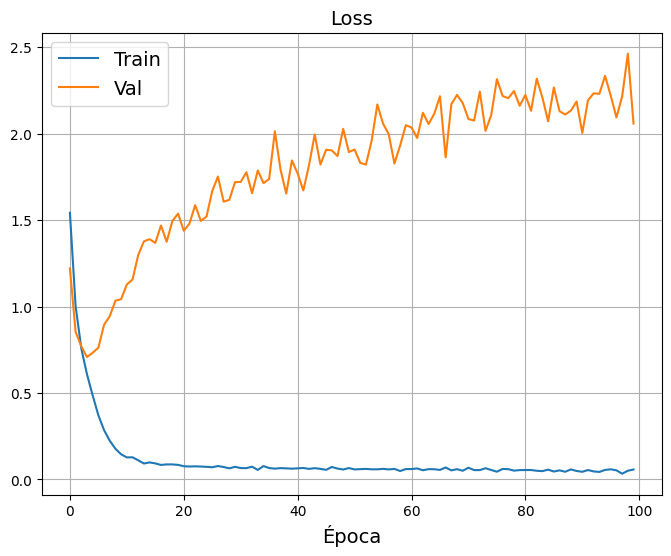

In [3]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Época', fontsize=14)
plt.legend(['Train', 'Val'], fontsize=14)
plt.title('Loss', fontsize=14)
plt.grid()
plt.show()

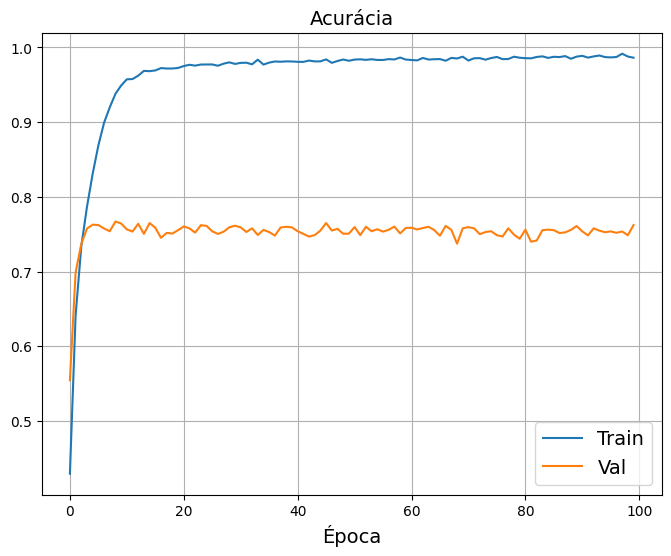

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Época', fontsize=14)
plt.legend(['Train', 'Val'], fontsize=14)
plt.title('Acurácia', fontsize=14)
plt.grid()
plt.show()

## Adicionando camadas de dropout.

In [6]:
# Define VGG model.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(units=512, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the defined model.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the VGG model.
history = model.fit(train_images, train_labels, batch_size=64, validation_data=(test_images, test_labels), epochs=100)

Epoch 1/100
782/782 [==============================] - 17s 13ms/step - loss: 1.7219 - accuracy: 0.3582 - val_loss: 1.3751 - val_accuracy: 0.4902
Epoch 2/100
782/782 [==============================] - 8s 10ms/step - loss: 1.3480 - accuracy: 0.5109 - val_loss: 1.1302 - val_accuracy: 0.5955
Epoch 3/100
782/782 [==============================] - 8s 10ms/step - loss: 1.2018 - accuracy: 0.5691 - val_loss: 1.0203 - val_accuracy: 0.6410
Epoch 4/100
782/782 [==============================] - 8s 10ms/step - loss: 1.0995 - accuracy: 0.6034 - val_loss: 0.9939 - val_accuracy: 0.6521
Epoch 5/100
782/782 [==============================] - 8s 10ms/step - loss: 1.0379 - accuracy: 0.6294 - val_loss: 0.8977 - val_accuracy: 0.6862
Epoch 6/100
782/782 [==============================] - 8s 10ms/step - loss: 0.9727 - accuracy: 0.6560 - val_loss: 0.9184 - val_accuracy: 0.6843
Epoch 7/100
782/782 [==============================] - 8s 10ms/step - loss: 0.9305 - accuracy: 0.6699 - val_loss: 0.8398 - val_accuracy

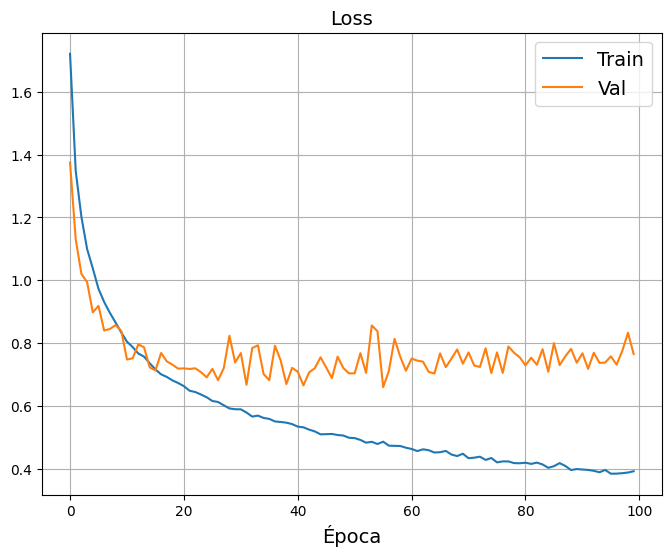

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Época', fontsize=14)
plt.legend(['Train', 'Val'], fontsize=14)
plt.title('Loss', fontsize=14)
plt.grid()
plt.show()

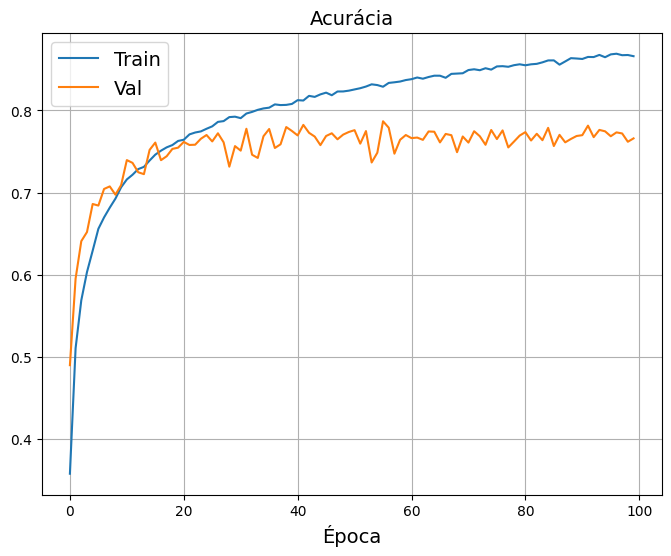

In [8]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Época', fontsize=14)
plt.legend(['Train', 'Val'], fontsize=14)
plt.title('Acurácia', fontsize=14)
plt.grid()
plt.show()

In [ ]:
# Define VGG model.
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=512, activation='relu', kernel_initializer='he_uniform'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the defined model.
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the VGG model.
history = model.fit(train_images, train_labels, batch_size=64, validation_data=(test_images, test_labels), epochs=200)

Epoch 1/100
782/782 [==============================] - 13s 12ms/step - loss: 1.8915 - accuracy: 0.2888 - val_loss: 2.1245 - val_accuracy: 0.2456
Epoch 2/100
782/782 [==============================] - 9s 12ms/step - loss: 1.5609 - accuracy: 0.4246 - val_loss: 1.9227 - val_accuracy: 0.3313
Epoch 3/100
782/782 [==============================] - 9s 12ms/step - loss: 1.4419 - accuracy: 0.4745 - val_loss: 2.0469 - val_accuracy: 0.2753
Epoch 4/100
782/782 [==============================] - 9s 12ms/step - loss: 1.3680 - accuracy: 0.5043 - val_loss: 1.8576 - val_accuracy: 0.3207
Epoch 5/100
782/782 [==============================] - 9s 12ms/step - loss: 1.3129 - accuracy: 0.5270 - val_loss: 1.5408 - val_accuracy: 0.4398
Epoch 6/100
782/782 [==============================] - 9s 12ms/step - loss: 1.2778 - accuracy: 0.5406 - val_loss: 1.5164 - val_accuracy: 0.4827
Epoch 7/100
782/782 [==============================] - 9s 12ms/step - loss: 1.2471 - accuracy: 0.5563 - val_loss: 1.7380 - val_accuracy

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Época', fontsize=14)
plt.legend(['Train', 'Val'], fontsize=14)
plt.title('Loss', fontsize=14)
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Época', fontsize=14)
plt.legend(['Train', 'Val'], fontsize=14)
plt.title('Acurácia', fontsize=14)
plt.grid()
plt.show()

**Observação**

Em redes convolucionais (CNNs) usadas para tarefas de visão computacional, como classificação de imagens, a adição de camadas de dropout é uma técnica comum para evitar o sobreajuste. A colocação estratégica das camadas de dropout é importante para obter um equilíbrio adequado entre regularização e capacidade de aprendizado. Aqui estão algumas diretrizes gerais sobre onde adicionar camadas de dropout em redes convolucionais:

1. **Camadas Totalmente Conectadas (Densas)**: As camadas densas geralmente estão localizadas no final da rede após as camadas convolucionais e de pooling. Adicionar camadas de dropout a essas camadas totalmente conectadas é uma prática comum. Essas camadas tendem a ter mais parâmetros e são mais propensas ao sobreajuste. Portanto, você pode adicionar dropout nas camadas densas, após a aplicação de Flatten ou Max. Pooling, por exemplo.

2. **Após Camadas Convolucionais e de Pooling**: Você também pode adicionar camadas de dropout após algumas camadas convolucionais e de pooling, especialmente se a rede for muito profunda. Isso ajuda a regularizar a aprendizagem nas camadas intermediárias da rede. No entanto, geralmente não se aplica dropout nas camadas de convolução diretamente, pois isso pode prejudicar a capacidade do modelo de aprender recursos importantes.

3. **Taxa de Dropout Gradual**: A taxa de dropout (a probabilidade de desligamento) pode ser ajustada gradualmente à medida que você se move mais profundamente na rede. Por exemplo, você pode usar uma taxa de dropout mais alta nas camadas densas e uma taxa de dropout mais baixa nas camadas intermediárias. Isso permite uma regularização mais forte nas camadas com mais parâmetros.

4. **Evitar Dropout nas Camadas de Saída**: Geralmente, não é aconselhável aplicar dropout nas camadas de saída, especialmente se estiver usando ativações softmax para classificação. O dropout nessas camadas pode prejudicar a confiança das previsões do modelo.

5. **Experimentação e Ajuste Fino**: A colocação e a taxa de dropout podem variar dependendo do problema e do tamanho da rede. Experimente diferentes configurações e ajuste fino para encontrar a melhor estratégia para o seu caso específico. Isso pode envolver o uso de técnicas como validação cruzada ou busca de hiperparâmetros.